 # Contextual bandits
 In this notebook, we implement the contextual bandit algorithm

In [1]:
import numpy as np
from math import sqrt, log
from matplotlib import pyplot as plt
from numpy.random import default_rng
random = default_rng()
from tqdm import tqdm
from functools import partial
from sklearn.linear_model import Lasso
from bandit import ContextualBandit
from experiment import ContextualBanditExperiment
from policy import LinUCB, LALasso

## Parameters and functions

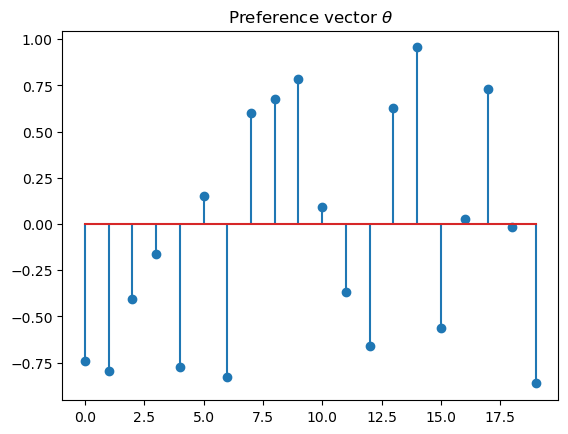

In [2]:
# n_arms= 50
dim = 20
theta =  (2*random.random(dim)-1)
experiment = ContextualBanditExperiment(horizon = 1000, repetitions= 20)

n_arms = 100
# sparsity = 50
# inds_to_zero = np.random.choice(range(dim), size= dim - sparsity, replace= False)
# theta[inds_to_zero] = 0.0
plt.figure()
plt.stem(theta)
plt.title(r"Preference vector $\theta$")

def context_sampler(dim, n_arms):
    return random.multivariate_normal(np.ones(dim), np.eye(dim), n_arms)

def context_sampler(dim, n_arms):
    return random.multivariate_normal(np.ones(dim), np.eye(dim), n_arms)

X = random.random((n_arms, dim))

def context_generator(horizon):
    for _ in range(horizon):
        yield X

noise_sampler = partial(random.normal, loc= 0.0, scale= 0.1)

## Ridge regression case

### Two arms, multiple simulations

In [3]:
# bandit = ContextualBandit(theta, n_arms= 2, context_sampler= context_sampler, noise_sampler= noise_sampler)
bandit = ContextualBandit(theta, n_arms= n_arms, context_generator= context_generator(experiment.horizon), noise_sampler= noise_sampler)
player = LinUCB(l_reg= 1.0, delta= 0.1)    
experiment.run_parallel(bandit, player)


100%|██████████| 1000/1000 [00:01<00:00, 604.42it/s]


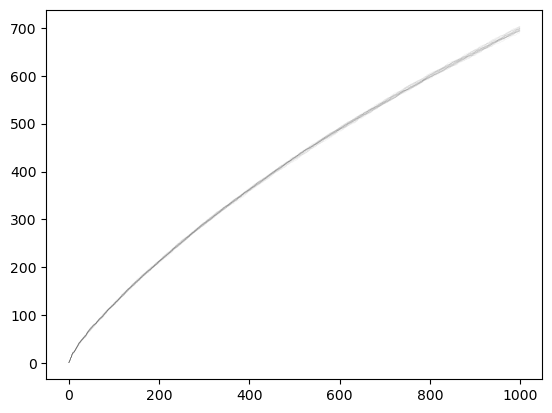

In [6]:
regret = experiment.compute_regret(take_mean= False)

plt.figure()
plt.plot(regret, 'k', alpha= 0.05, linewidth= 0.5);
plt.plot(regret.mean(axis= 1), linewidth= 2)



In [5]:
experiment.reward_history_oracle

array([1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622958,
       1.13622958, 1.13622958, 1.13622958, 1.13622958, 1.13622

## Lasso regression

### Simple case with one repetition

In [7]:
# TODO: debug code to obtain sublinear regret
bandit = ContextualBandit(theta, n_arms= 2, context_sampler= context_sampler, noise_sampler= noise_sampler)
player = LALasso(np.zeros(dim), l_reg= 1.0, delta= 0.01)
experiment.run_parallel(bandit, player)

100%|██████████| 1000/1000 [00:18<00:00, 54.62it/s]


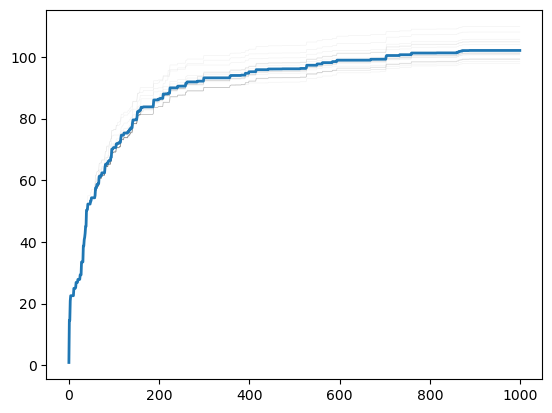

In [9]:
regret = experiment.compute_regret(take_mean= False)

plt.figure()
plt.plot(regret, 'k', alpha= 0.05, linewidth= 0.5);
plt.plot(regret.mean(axis= 1), linewidth= 2)